To install MS fonts, run the following commands:

* apt update
* apt install msttcorefonts -qq
* rm ~/.cache/matplotlib -rf

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json

%matplotlib inline

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams["font.family"] = "Times New Roman"

In [2]:
datasets = [
    "breast_cancer",
    "glass",
    "iris",
    "letter",
    "mnist",
    "motion_sense",
    "satimage",
    "segment",
    "vehicle",
    "wine"
]

metrics_to_use = {
    "breast_cancer": "f1 weighted",
    "glass": "f1 weighted",
    "iris": "accuracy",
    "letter": "accuracy",
    "mnist": "accuracy",
    "motion_sense": "accuracy",
    "satimage": "f1 weighted",
    "segment": "accuracy",
    "vehicle": "accuracy",
    "wine": "f1 weighted"
}


dfs = [
    pd.read_csv(list(sorted(Path(f"{dset} experiment").glob("*.csv")))[-1])
    for dset in datasets
]

df = pd.concat(dfs)
df.replace({"mnist-dist-16": "mnist"}, inplace=True)
df
# d = json.loads(df.iloc[0]["encoder kwargs"])

,bleach,accuracy,f1 weighted,f1 macro,f1 micro,ties,run,train time,predict time,ram name,...,encoder kwargs,experiment name,model size,train samples,test samples,classes,rams per discriminator,discriminators,seed,indices
0,2,0.929825,0.930219,0.925974,0.929825,20,1,1.861801,0.197185,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,5186,398,171,2,30,2,1670456207,480
1,5,0.941520,0.941520,0.937573,0.941520,6,1,1.861801,0.049474,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,5186,398,171,2,30,2,1670456207,480
2,10,0.923977,0.924093,0.919096,0.923977,3,1,1.861801,0.049694,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,5186,398,171,2,30,2,1670456207,480
3,2,0.883041,0.884713,0.879577,0.883041,25,2,0.154084,0.050047,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,5309,398,171,2,30,2,1670456210,480
4,5,0.941520,0.941114,0.936742,0.941520,6,2,0.154084,0.049624,DictRam,...,"{""resolution"": 16}",breast_cancer experiment,5309,398,171,2,30,2,1670456210,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,2,0.907407,0.905717,0.907463,0.907407,3,3,0.015163,0.013833,stream-threshold,...,"{""resolution"": 16}",wine experiment,31824,124,54,3,13,3,1670456327,208
581,5,0.907407,0.905154,0.910869,0.907407,1,3,0.015163,0.014925,stream-threshold,...,"{""resolution"": 16}",wine experiment,31824,124,54,3,13,3,1670456327,208
582,8,0.870370,0.868130,0.872355,0.870370,2,3,0.015163,0.015248,stream-threshold,...,"{""resolution"": 16}",wine experiment,31824,124,54,3,13,3,1670456327,208
583,10,0.814815,0.812015,0.820887,0.814815,1,3,0.015163,0.013476,stream-threshold,...,"{""resolution"": 16}",wine experiment,31824,124,54,3,13,3,1670456327,208


In [3]:
def select_pareto_frontier_points(Xs, Ys, maxX=True, maxY=True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    return pareto_front

/tmp/ipykernel_354063/1350482932.py:8: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for dset_name, dset_df in df.groupby(["dataset name"]):


[('x', 'tab:blue'), ('P', 'tab:blue'), ('P', 'tab:orange'), ('P', 'tab:green'), ('P', 'tab:red'), ('>', 'tab:blue'), ('>', 'tab:orange'), ('>', 'tab:green'), ('>', 'tab:red'), ('>', 'tab:purple'), ('>', 'tab:brown'), ('^', 'tab:blue'), ('^', 'tab:orange'), ('^', 'tab:green'), ('^', 'tab:red'), ('^', 'tab:purple'), ('^', 'tab:brown'), ('^', 'tab:pink'), ('^', 'tab:gray'), ('^', 'tab:olive'), ('^', 'tab:cyan'), ('o', 'tab:blue'), ('o', 'tab:orange'), ('o', 'tab:green'), ('o', 'tab:red'), ('o', 'tab:purple'), ('o', 'tab:brown'), ('o', 'tab:pink'), ('o', 'tab:gray'), ('<', 'tab:blue'), ('<', 'tab:orange'), ('<', 'tab:green'), ('<', 'tab:red'), ('<', 'tab:purple'), ('<', 'tab:brown'), ('<', 'tab:pink'), ('<', 'tab:gray'), ('<', 'tab:olive'), ('<', 'tab:cyan')]


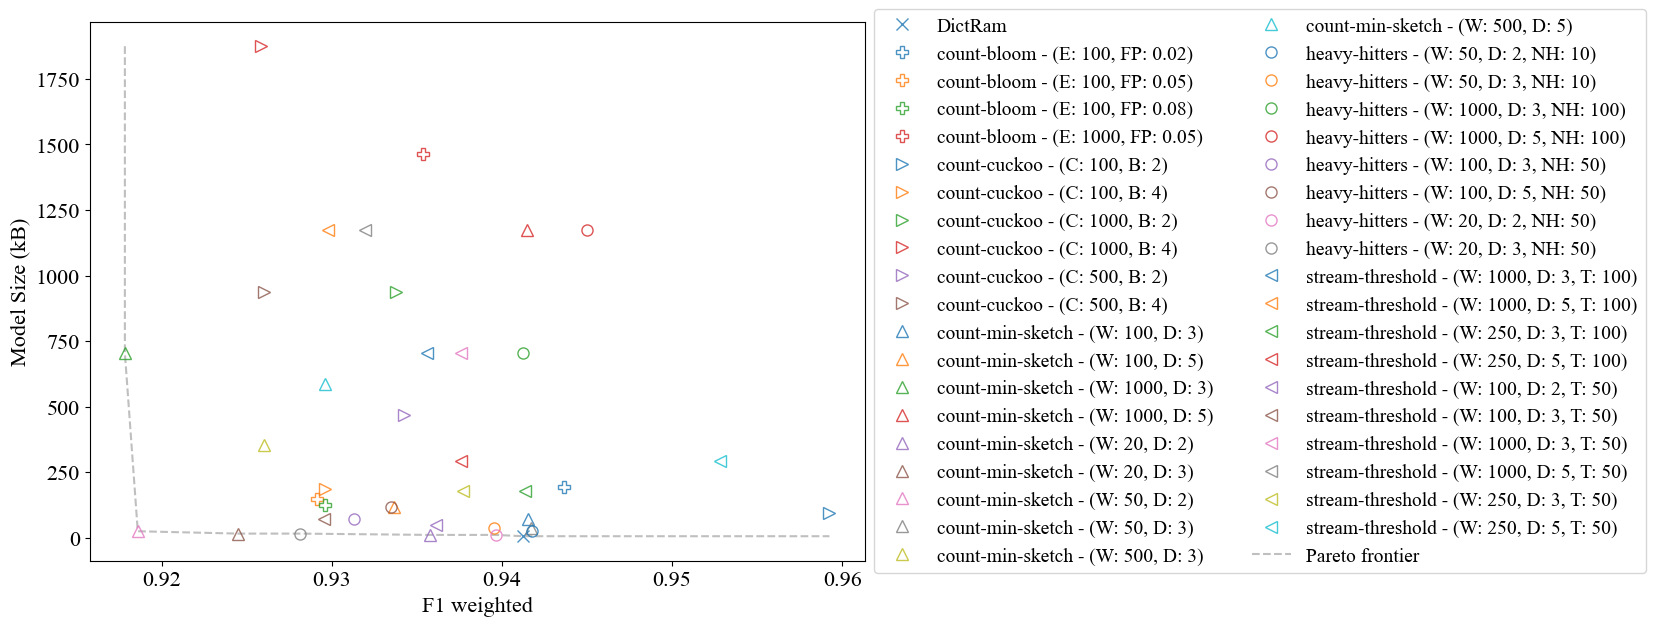

Max std (breast_cancer): 2.633849867026777
[('x', 'tab:blue'), ('P', 'tab:blue'), ('P', 'tab:orange'), ('P', 'tab:green'), ('P', 'tab:red'), ('>', 'tab:blue'), ('>', 'tab:orange'), ('>', 'tab:green'), ('>', 'tab:red'), ('>', 'tab:purple'), ('>', 'tab:brown'), ('^', 'tab:blue'), ('^', 'tab:orange'), ('^', 'tab:green'), ('^', 'tab:red'), ('^', 'tab:purple'), ('^', 'tab:brown'), ('^', 'tab:pink'), ('^', 'tab:gray'), ('^', 'tab:olive'), ('^', 'tab:cyan'), ('o', 'tab:blue'), ('o', 'tab:orange'), ('o', 'tab:green'), ('o', 'tab:red'), ('o', 'tab:purple'), ('o', 'tab:brown'), ('o', 'tab:pink'), ('o', 'tab:gray'), ('<', 'tab:blue'), ('<', 'tab:orange'), ('<', 'tab:green'), ('<', 'tab:red'), ('<', 'tab:purple'), ('<', 'tab:brown'), ('<', 'tab:pink'), ('<', 'tab:gray'), ('<', 'tab:olive'), ('<', 'tab:cyan')]


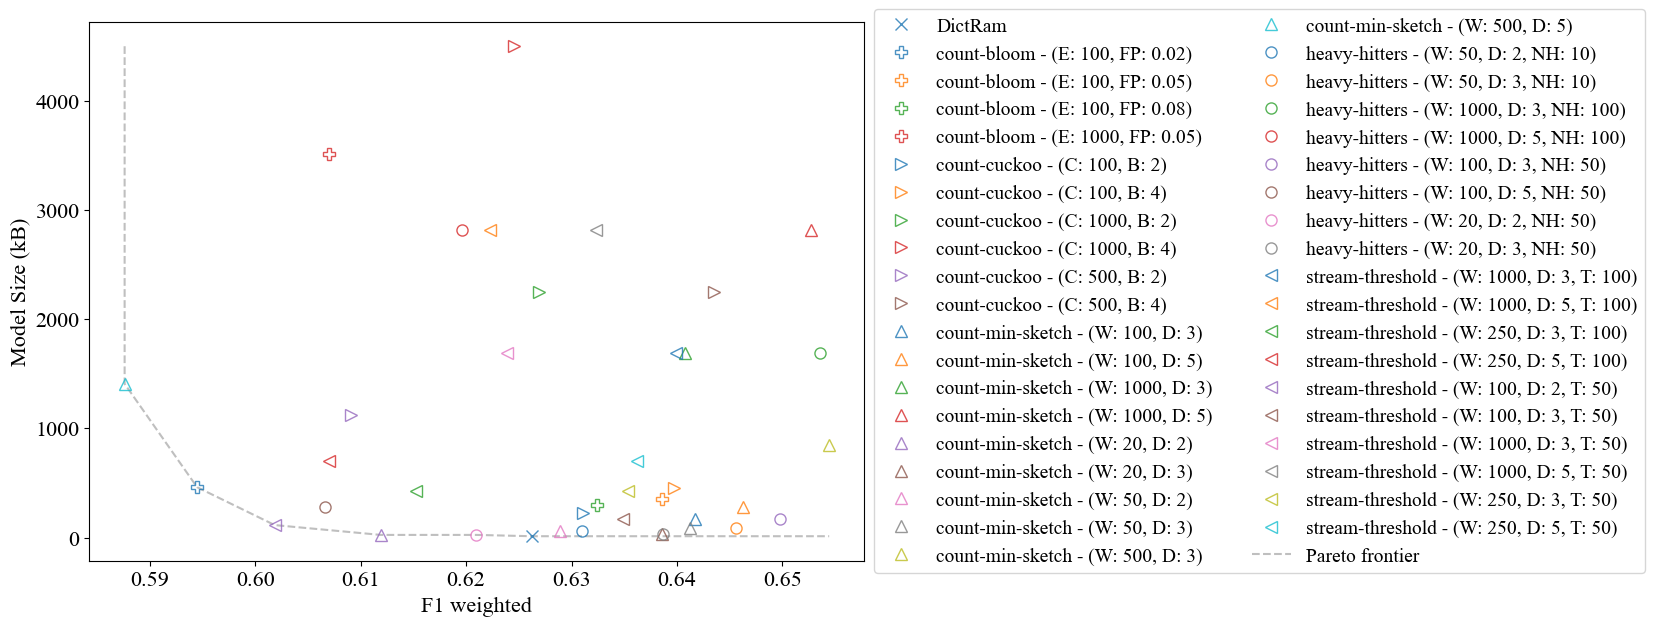

Max std (glass): 6.351858841137473
[('x', 'tab:blue'), ('P', 'tab:blue'), ('P', 'tab:orange'), ('P', 'tab:green'), ('P', 'tab:red'), ('>', 'tab:blue'), ('>', 'tab:orange'), ('>', 'tab:green'), ('>', 'tab:red'), ('>', 'tab:purple'), ('>', 'tab:brown'), ('^', 'tab:blue'), ('^', 'tab:orange'), ('^', 'tab:green'), ('^', 'tab:red'), ('^', 'tab:purple'), ('^', 'tab:brown'), ('^', 'tab:pink'), ('^', 'tab:gray'), ('^', 'tab:olive'), ('^', 'tab:cyan'), ('o', 'tab:blue'), ('o', 'tab:orange'), ('o', 'tab:green'), ('o', 'tab:red'), ('o', 'tab:purple'), ('o', 'tab:brown'), ('o', 'tab:pink'), ('o', 'tab:gray'), ('<', 'tab:blue'), ('<', 'tab:orange'), ('<', 'tab:green'), ('<', 'tab:red'), ('<', 'tab:purple'), ('<', 'tab:brown'), ('<', 'tab:pink'), ('<', 'tab:gray'), ('<', 'tab:olive'), ('<', 'tab:cyan')]


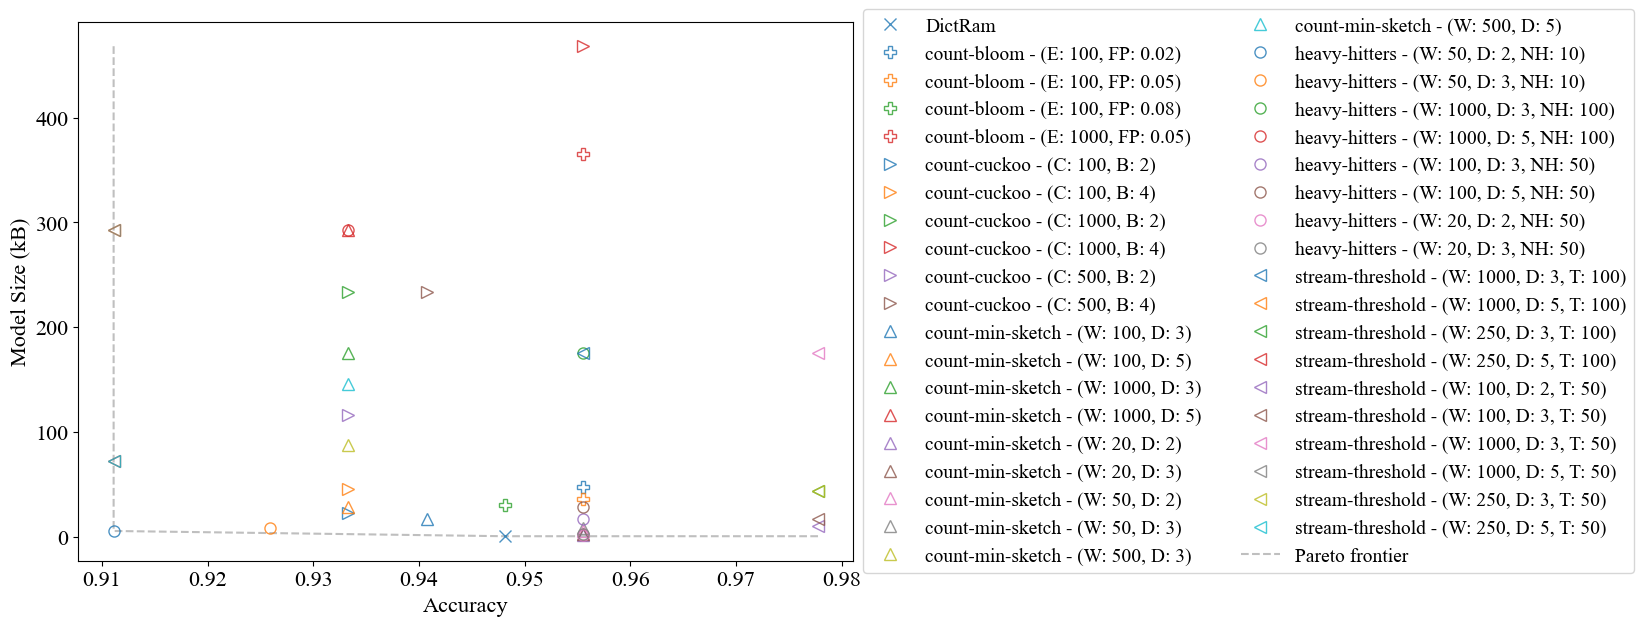

Max std (iris): 3.8490017945974917
[('x', 'tab:blue'), ('P', 'tab:blue'), ('P', 'tab:orange'), ('P', 'tab:green'), ('P', 'tab:red'), ('>', 'tab:blue'), ('>', 'tab:orange'), ('>', 'tab:green'), ('>', 'tab:red'), ('>', 'tab:purple'), ('>', 'tab:brown'), ('^', 'tab:blue'), ('^', 'tab:orange'), ('^', 'tab:green'), ('^', 'tab:red'), ('^', 'tab:purple'), ('^', 'tab:brown'), ('^', 'tab:pink'), ('^', 'tab:gray'), ('^', 'tab:olive'), ('^', 'tab:cyan'), ('o', 'tab:blue'), ('o', 'tab:orange'), ('o', 'tab:green'), ('o', 'tab:red'), ('o', 'tab:purple'), ('o', 'tab:brown'), ('o', 'tab:pink'), ('o', 'tab:gray'), ('<', 'tab:blue'), ('<', 'tab:orange'), ('<', 'tab:green'), ('<', 'tab:red'), ('<', 'tab:purple'), ('<', 'tab:brown'), ('<', 'tab:pink'), ('<', 'tab:gray'), ('<', 'tab:olive'), ('<', 'tab:cyan')]


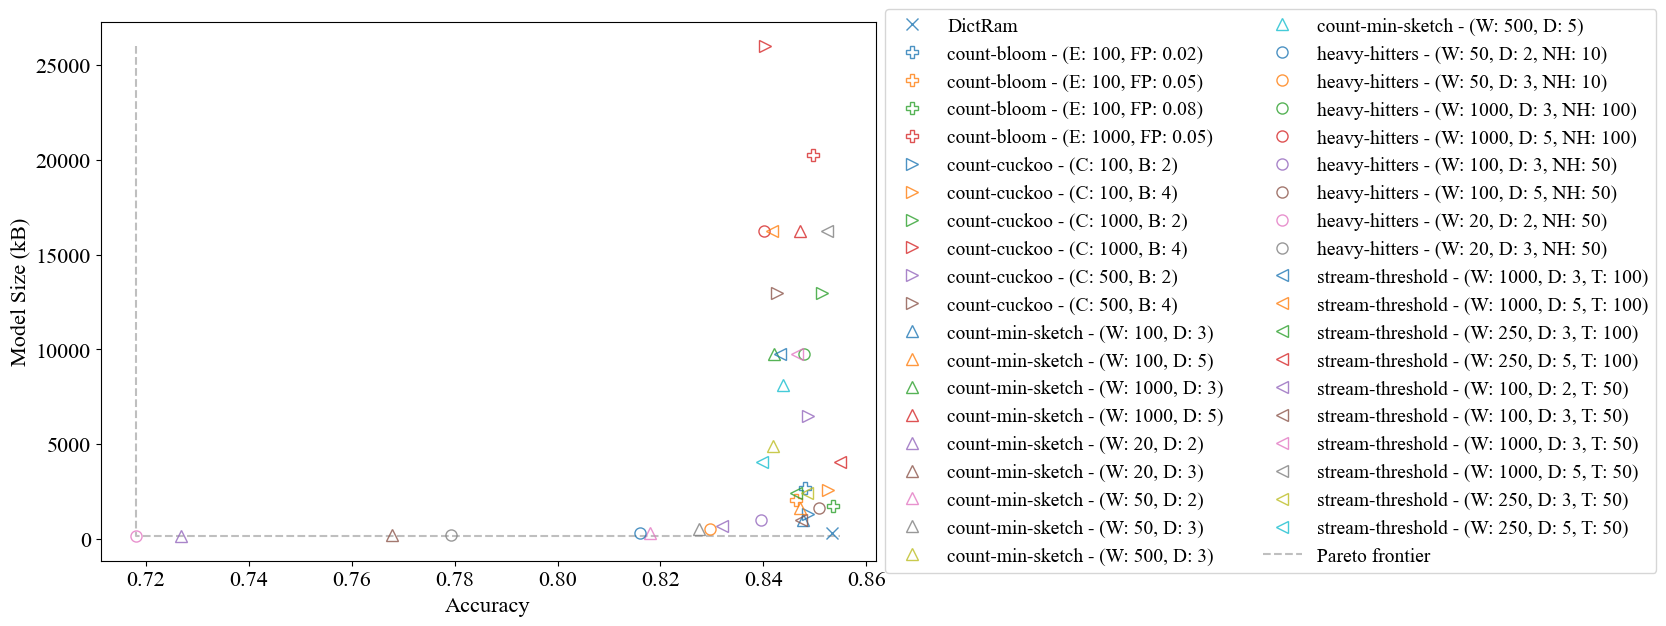

Max std (letter): 2.0897235330168558
[('x', 'tab:blue'), ('P', 'tab:blue'), ('P', 'tab:orange'), ('P', 'tab:green'), ('P', 'tab:red'), ('>', 'tab:blue'), ('>', 'tab:orange'), ('>', 'tab:green'), ('>', 'tab:red'), ('>', 'tab:purple'), ('>', 'tab:brown'), ('^', 'tab:blue'), ('^', 'tab:orange'), ('^', 'tab:green'), ('^', 'tab:red'), ('^', 'tab:purple'), ('^', 'tab:brown'), ('^', 'tab:pink'), ('^', 'tab:gray'), ('^', 'tab:olive'), ('^', 'tab:cyan'), ('o', 'tab:blue'), ('o', 'tab:orange'), ('o', 'tab:green'), ('o', 'tab:red'), ('o', 'tab:purple'), ('o', 'tab:brown'), ('o', 'tab:pink'), ('o', 'tab:gray'), ('<', 'tab:blue'), ('<', 'tab:orange'), ('<', 'tab:green'), ('<', 'tab:red'), ('<', 'tab:purple'), ('<', 'tab:brown'), ('<', 'tab:pink'), ('<', 'tab:gray'), ('<', 'tab:olive'), ('<', 'tab:cyan')]


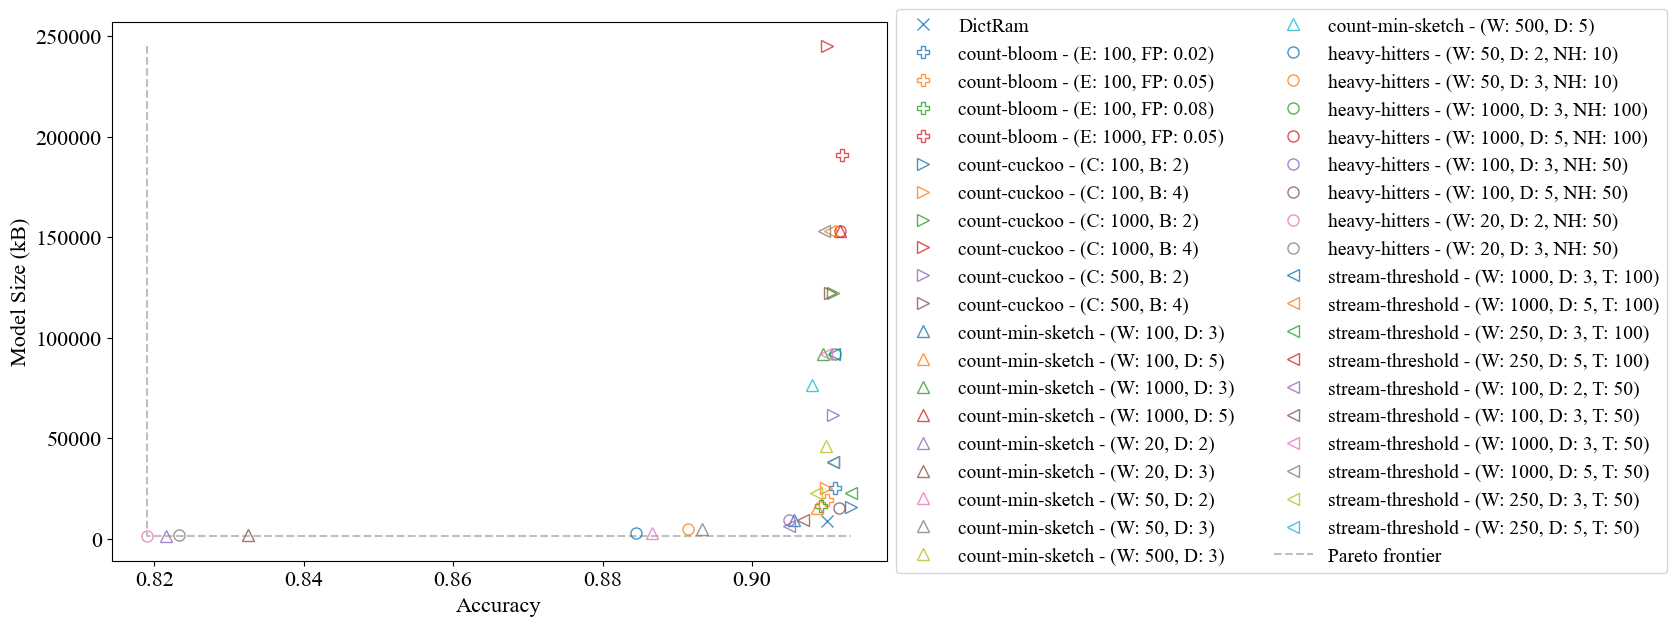

Max std (mnist): nan
[('x', 'tab:blue'), ('P', 'tab:blue'), ('P', 'tab:orange'), ('P', 'tab:green'), ('P', 'tab:red'), ('>', 'tab:blue'), ('>', 'tab:orange'), ('>', 'tab:green'), ('>', 'tab:red'), ('>', 'tab:purple'), ('>', 'tab:brown'), ('^', 'tab:blue'), ('^', 'tab:orange'), ('^', 'tab:green'), ('^', 'tab:red'), ('^', 'tab:purple'), ('^', 'tab:brown'), ('^', 'tab:pink'), ('^', 'tab:gray'), ('^', 'tab:olive'), ('^', 'tab:cyan'), ('o', 'tab:blue'), ('o', 'tab:orange'), ('o', 'tab:green'), ('o', 'tab:red'), ('o', 'tab:purple'), ('o', 'tab:brown'), ('o', 'tab:pink'), ('o', 'tab:gray'), ('<', 'tab:blue'), ('<', 'tab:orange'), ('<', 'tab:green'), ('<', 'tab:red'), ('<', 'tab:purple'), ('<', 'tab:brown'), ('<', 'tab:pink'), ('<', 'tab:gray'), ('<', 'tab:olive'), ('<', 'tab:cyan')]


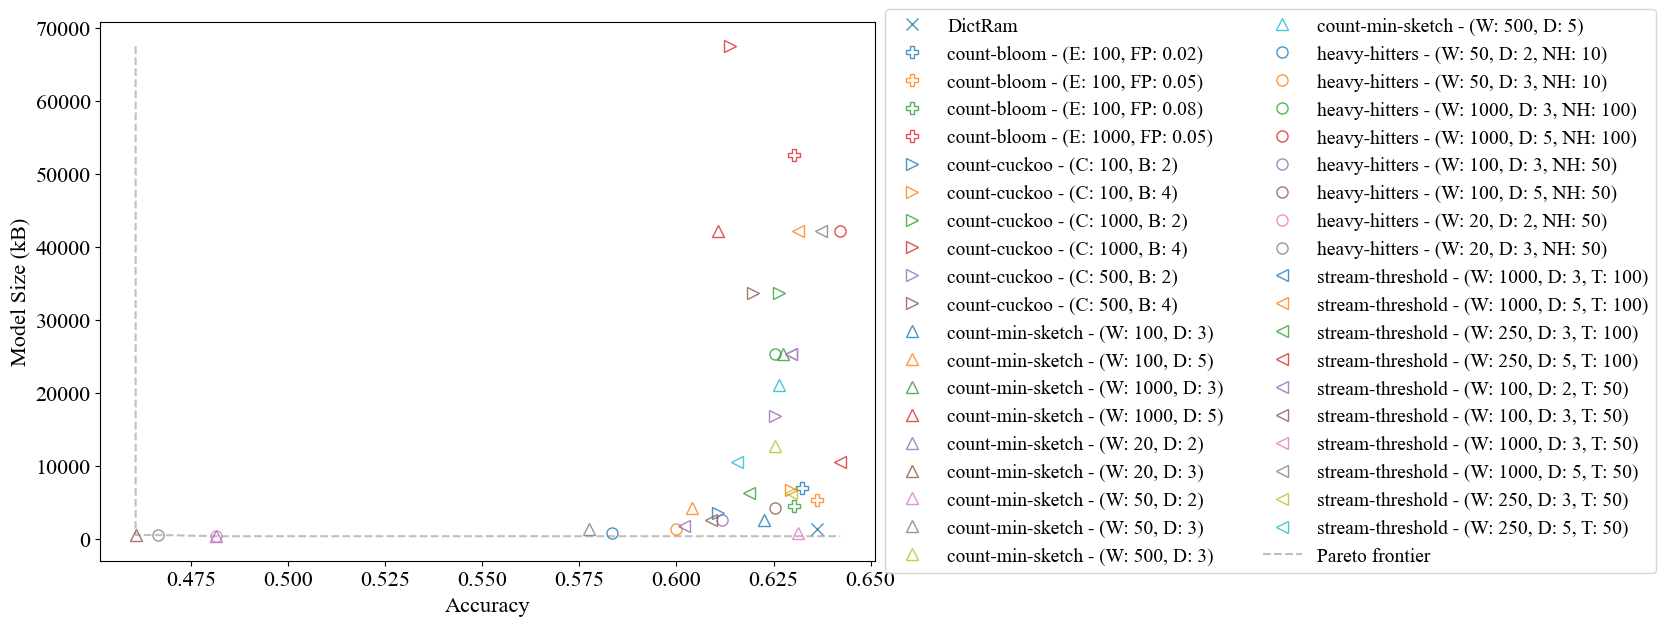

Max std (motion_sense): nan
[('x', 'tab:blue'), ('P', 'tab:blue'), ('P', 'tab:orange'), ('P', 'tab:green'), ('P', 'tab:red'), ('>', 'tab:blue'), ('>', 'tab:orange'), ('>', 'tab:green'), ('>', 'tab:red'), ('>', 'tab:purple'), ('>', 'tab:brown'), ('^', 'tab:blue'), ('^', 'tab:orange'), ('^', 'tab:green'), ('^', 'tab:red'), ('^', 'tab:purple'), ('^', 'tab:brown'), ('^', 'tab:pink'), ('^', 'tab:gray'), ('^', 'tab:olive'), ('^', 'tab:cyan'), ('o', 'tab:blue'), ('o', 'tab:orange'), ('o', 'tab:green'), ('o', 'tab:red'), ('o', 'tab:purple'), ('o', 'tab:brown'), ('o', 'tab:pink'), ('o', 'tab:gray'), ('<', 'tab:blue'), ('<', 'tab:orange'), ('<', 'tab:green'), ('<', 'tab:red'), ('<', 'tab:purple'), ('<', 'tab:brown'), ('<', 'tab:pink'), ('<', 'tab:gray'), ('<', 'tab:olive'), ('<', 'tab:cyan')]


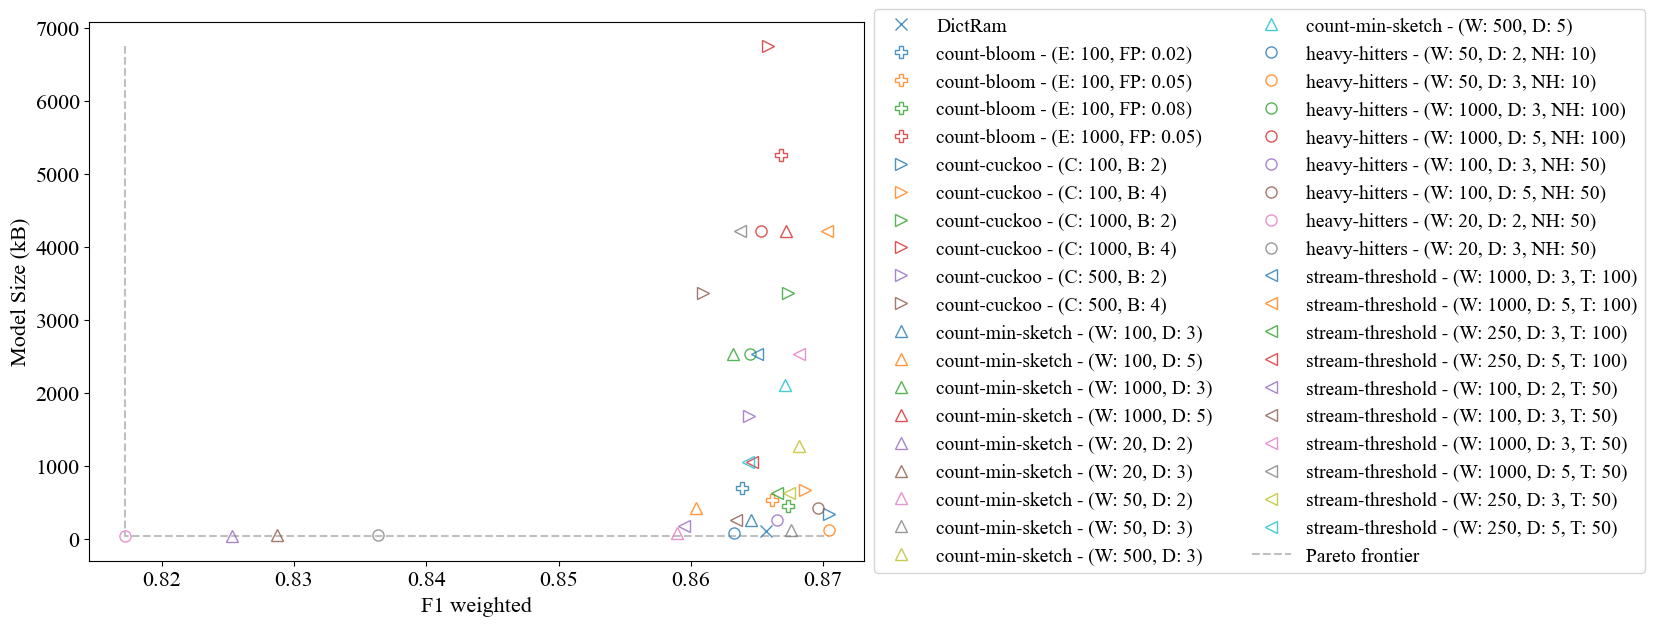

Max std (satimage): 2.134855904811924
[('x', 'tab:blue'), ('P', 'tab:blue'), ('P', 'tab:orange'), ('P', 'tab:green'), ('P', 'tab:red'), ('>', 'tab:blue'), ('>', 'tab:orange'), ('>', 'tab:green'), ('>', 'tab:red'), ('>', 'tab:purple'), ('>', 'tab:brown'), ('^', 'tab:blue'), ('^', 'tab:orange'), ('^', 'tab:green'), ('^', 'tab:red'), ('^', 'tab:purple'), ('^', 'tab:brown'), ('o', 'tab:blue'), ('o', 'tab:orange'), ('o', 'tab:green'), ('o', 'tab:red'), ('<', 'tab:blue'), ('<', 'tab:orange'), ('<', 'tab:green'), ('<', 'tab:red'), ('<', 'tab:purple'), ('<', 'tab:brown'), ('<', 'tab:pink'), ('<', 'tab:gray')]


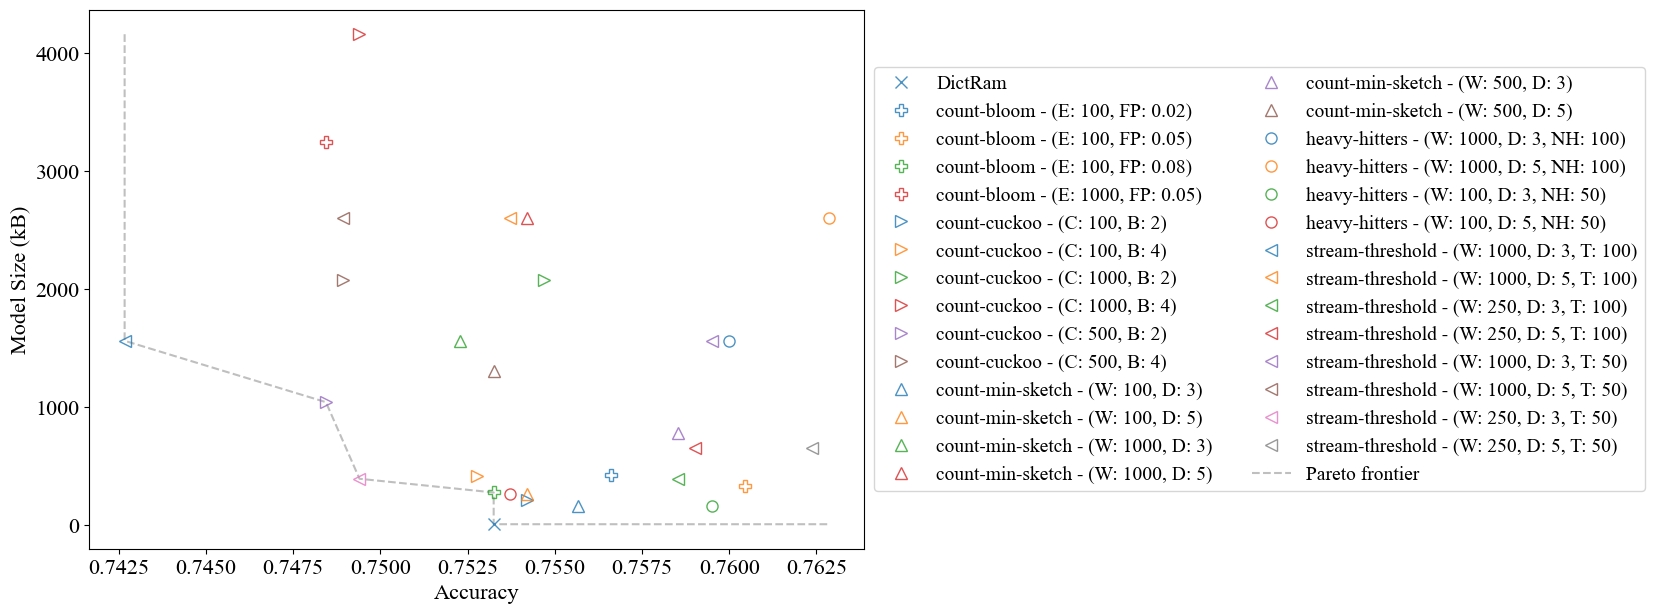

Max std (segment): 2.1709060310527697
[('x', 'tab:blue'), ('P', 'tab:blue'), ('P', 'tab:orange'), ('P', 'tab:green'), ('P', 'tab:red'), ('>', 'tab:blue'), ('>', 'tab:orange'), ('>', 'tab:green'), ('>', 'tab:red'), ('>', 'tab:purple'), ('>', 'tab:brown'), ('^', 'tab:blue'), ('^', 'tab:orange'), ('^', 'tab:green'), ('^', 'tab:red'), ('^', 'tab:purple'), ('^', 'tab:brown'), ('^', 'tab:pink'), ('^', 'tab:gray'), ('^', 'tab:olive'), ('^', 'tab:cyan'), ('o', 'tab:blue'), ('o', 'tab:orange'), ('o', 'tab:green'), ('o', 'tab:red'), ('o', 'tab:purple'), ('o', 'tab:brown'), ('o', 'tab:pink'), ('o', 'tab:gray'), ('<', 'tab:blue'), ('<', 'tab:orange'), ('<', 'tab:green'), ('<', 'tab:red'), ('<', 'tab:purple'), ('<', 'tab:brown'), ('<', 'tab:pink'), ('<', 'tab:gray'), ('<', 'tab:olive'), ('<', 'tab:cyan')]


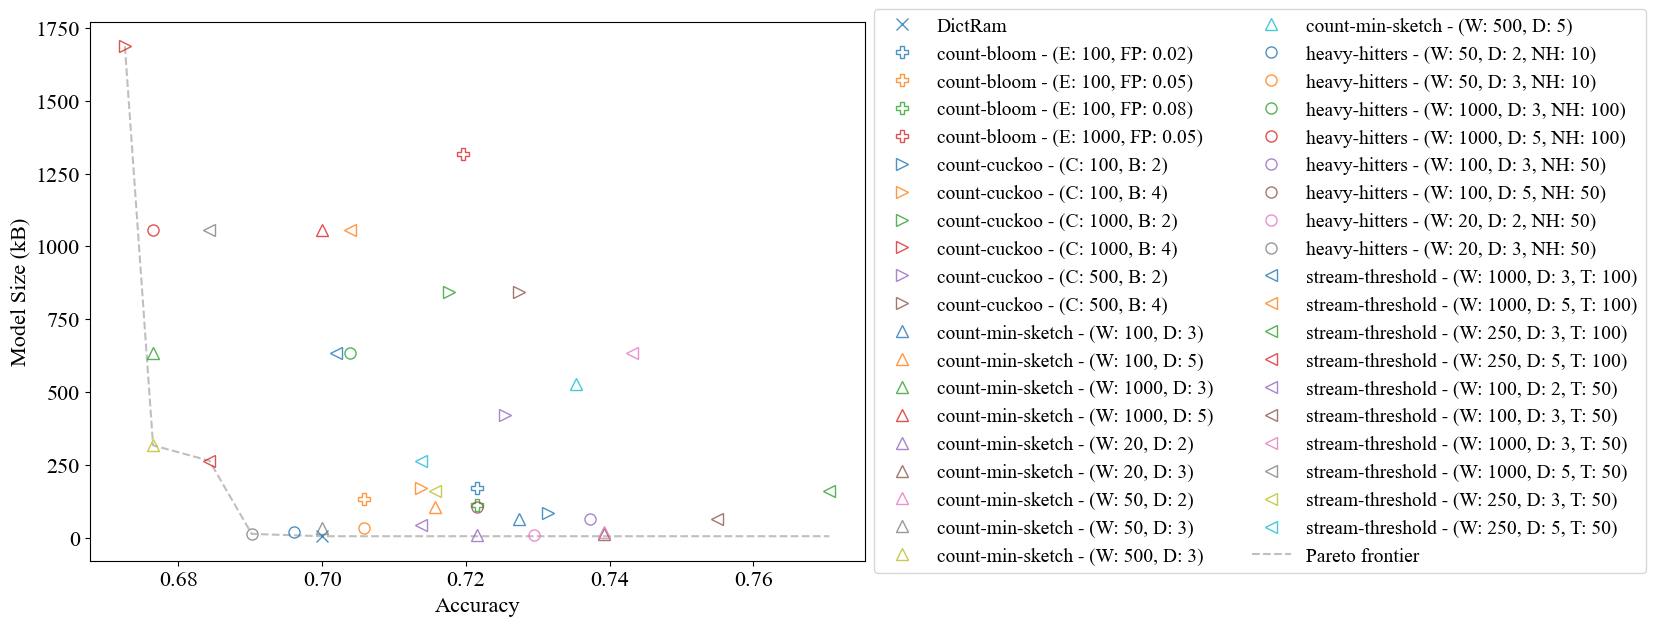

Max std (vehicle): 7.471591718924568
[('x', 'tab:blue'), ('P', 'tab:blue'), ('P', 'tab:orange'), ('P', 'tab:green'), ('P', 'tab:red'), ('>', 'tab:blue'), ('>', 'tab:orange'), ('>', 'tab:green'), ('>', 'tab:red'), ('>', 'tab:purple'), ('>', 'tab:brown'), ('^', 'tab:blue'), ('^', 'tab:orange'), ('^', 'tab:green'), ('^', 'tab:red'), ('^', 'tab:purple'), ('^', 'tab:brown'), ('^', 'tab:pink'), ('^', 'tab:gray'), ('^', 'tab:olive'), ('^', 'tab:cyan'), ('o', 'tab:blue'), ('o', 'tab:orange'), ('o', 'tab:green'), ('o', 'tab:red'), ('o', 'tab:purple'), ('o', 'tab:brown'), ('o', 'tab:pink'), ('o', 'tab:gray'), ('<', 'tab:blue'), ('<', 'tab:orange'), ('<', 'tab:green'), ('<', 'tab:red'), ('<', 'tab:purple'), ('<', 'tab:brown'), ('<', 'tab:pink'), ('<', 'tab:gray'), ('<', 'tab:olive'), ('<', 'tab:cyan')]


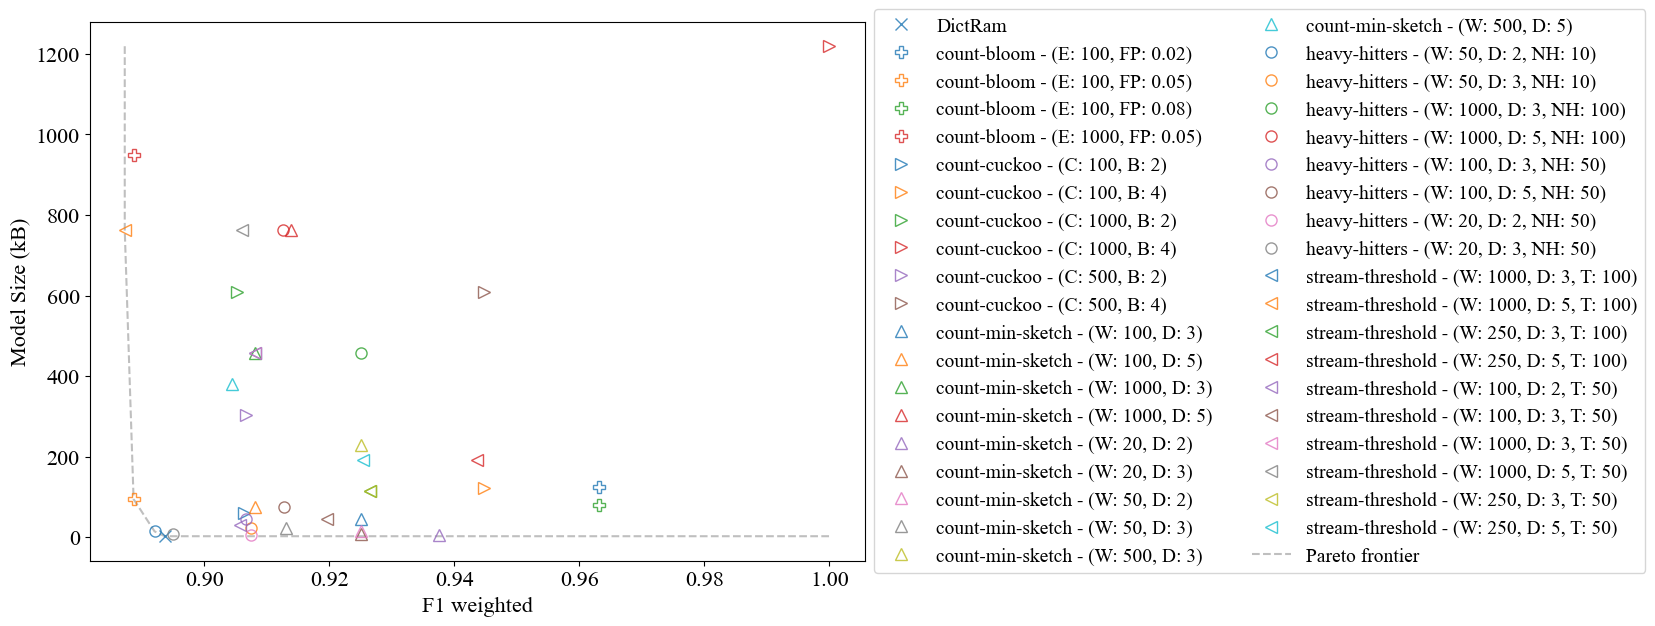

Max std (wine): 5.410058739518063


In [31]:
plt.style.use('tableau-colorblind10')

title = None
# markers = ["+", "^", "D", "P", "x", "8"]
markers = ["x", "P", ">", "^", "o", "<", "s", "v", "h"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for dset_name, dset_df in df.groupby(["dataset name"]):
    acc_size_errors = []
    labels = []
    plt_mark_colors = []
    
    rams = []
    ram_kwargs_list = []
    normal_set = False
    normal_size = 0
    errs = []
    metric = metrics_to_use[dset_name]
    
    for (ram_name, ram_kwargs), ram_dset_df in dset_df.groupby(["ram name", "ram kwargs"]):
        if ram_name != "DictRam":
            continue
            
        best_bleach = ram_dset_df.pivot_table(columns="bleach", values="accuracy", aggfunc="mean").mean().sort_values(ascending=False).reset_index()["bleach"].iloc[0]
        ram_dset_df = ram_dset_df.loc[ram_dset_df["bleach"] == best_bleach]
        normal_size = (dset_df["rams per discriminator"] * dset_df["discriminators"] * 2**dset_df["tuple size"]).iloc[0] * 8
        normal_size = normal_size // 1024
        break
    
    
    for (ram_name, ram_kwargs), ram_dset_df in dset_df.groupby(["ram name", "ram kwargs"]):
        # if ram_name == "DictRam":
        #     continue
        
        # if "cuckoo" in ram_name or "heavy" in ram_name or "stream" in ram_name:
        #     continue
            
        best_bleach = ram_dset_df.pivot_table(columns="bleach", values="accuracy", aggfunc="mean").mean().sort_values(ascending=False).reset_index()["bleach"].iloc[0]
        ram_dset_df = ram_dset_df.loc[ram_dset_df["bleach"] == best_bleach]
        # calc acc
        acc = ram_dset_df[metric].mean()
        # calc acc stdev
        std = ram_dset_df[metric].std()
        # calc size
        # if ram_name == "DictRam" and not normal_set:
        #     size = (dset_df["rams per discriminator"] * dset_df["discriminators"] * 2**dset_df["tuple size"]).iloc[0] * 8
        #     acc_size_errors.append((acc, std, size))
        #     labels.append(f"VectorRAM - ({', '.join(args_string)})")
        #     rams.append("VectorRAM")
        #     ram_kwargs_list.append("")
        #     normal_set = True
        # else:
        size = ram_dset_df["model size"].mean() // 1024
        # print(size)
        # append to list
        acc_size_errors.append((acc, std, size))
        rams.append(ram_name)
        ram_kwargs_list.append(ram_kwargs)
        
        # plt_mark_colors.append(("x", color[i]))
        
        # Parse kwargs
        values = json.loads(ram_kwargs)
        args_string = []
        if "est_elements" in values:
            args_string.append(f"E: {values['est_elements']}")
        if "false_positive_rate" in values:
            args_string.append(f"FP: {values['false_positive_rate']}")
        if "capacity" in values:
            args_string.append(f"C: {values['capacity']}")
        if "bucket_size" in values:
            args_string.append(f"B: {values['bucket_size']}")
        if "width" in values:
            args_string.append(f"W: {values['width']}")
        if "depth" in values:
            args_string.append(f"D: {values['depth']}")
        if "num_hitters" in values:
            args_string.append(f"NH: {values['num_hitters']}")
        if "threshold" in values:
            args_string.append(f"T: {values['threshold']}")
        
        if args_string:
            labels.append(f"{ram_name} - ({', '.join(args_string)})")
        else:
            labels.append(ram_name)
    
        
    xs = [x[0] for x in acc_size_errors]
    errs = [x[1] for x in acc_size_errors]
    ys = [x[2] for x in acc_size_errors]
    
    
    for i, r in enumerate(np.unique(rams)):
        c = 0
        for j, (ram, arg) in enumerate(zip(rams, ram_kwargs_list)):
            if r == ram:
                plt_mark_colors.append((markers[i], colors[c]))
                c += 1
    print(plt_mark_colors)

    fig, ax = plt.subplots(1, figsize=(10, 7))
    for acc, size, err, label, mark_color in zip(xs, ys, errs, labels, plt_mark_colors):
        marker, color = mark_color
        ax.plot(acc, size, alpha=0.8, c=color, marker=marker, label=label,  markersize=8, markerfacecolor='None', markeredgecolor=color, linestyle = 'None')
        # ax.errorbar(acc, size, alpha=0.8, xerr=err, ecolor=color, marker=marker, label=label, markersize=8, markerfacecolor='None', markeredgecolor=color, linestyle = 'None')
        errs.append(err)
        
    # Draw Paretto
    pareto_front = select_pareto_frontier_points(xs, ys, maxX=False, maxY=False)
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    pf_X.insert(0,pf_X[0])
    pf_Y.insert(0,max(ys))
    pf_X.append(max(xs))
    pf_Y.append(pf_Y[-1])
    ax.plot(pf_X, pf_Y, color='gray', linestyle='dashed', label="Pareto frontier", zorder=-1, alpha=0.5)
        
    ax.set_xlabel(f"{metric.capitalize()}", fontsize=16)
    ax.set_ylabel("Model Size (kB)", fontsize=16)
    # ax.set_title(dset_name, fontsize=14)
    # ax.legend(fontsize=11, bbox_to_anchor=(1.0, 1.0), loc='right')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14, ncol=2)
    ax.tick_params(axis='both', which='major', labelsize=16)

    plt.savefig(f"acc_size_{dset_name}.pdf", bbox_inches="tight")
    plt.show()
    plt.close()
    
    print(f"Max std ({dset_name}): {np.max(errs)*100}")
    
        
#     dset_df = dset_df.loc[dset_df["ram name"] != "DictRam"]
    
#     display(HTML(dset_df.sort_values("model size").head().to_html()))
#     # for (ram_name, ram_args, bleach), subdf in dset_df.groupby(["ram name", "ram kwargs", "bleach"]):
#     #     print(dset_name, ram_name, ram_args, bleach, subdf["accuracy"].mean(), subdf["f1 weighted"].mean(), subdf["model size"].mean())
#     print("-------")

In [32]:
df.loc[df["dataset name"] == "wine", ["encoder", "encoder kwargs", "tuple size", "bleach"]].head(n=20)

,encoder,encoder kwargs,tuple size,bleach
0,distributive-thermometer,"{""resolution"": 16}",16,2
1,distributive-thermometer,"{""resolution"": 16}",16,5
2,distributive-thermometer,"{""resolution"": 16}",16,8
3,distributive-thermometer,"{""resolution"": 16}",16,10
4,distributive-thermometer,"{""resolution"": 16}",16,15
5,distributive-thermometer,"{""resolution"": 16}",16,2
6,distributive-thermometer,"{""resolution"": 16}",16,5
7,distributive-thermometer,"{""resolution"": 16}",16,8
8,distributive-thermometer,"{""resolution"": 16}",16,10
9,distributive-thermometer,"{""resolution"": 16}",16,15


In [ ]:
for dataset in datasets:
    dataset_path = list(Path(f"{dataset} Exp/").glob("*.csv"))[0]
    print(dataset_path)
    df = pd.read_csv(dataset_path)
    
    vals = []
    names = []
    for (ram_name, bleach, args), subdf in df.groupby(["ram name", "bleach", "ram kwargs"]):
        if bleach == 2:
            if ram_name in names:
                continue
            vals.append((subdf["accuracy"].astype(float).values).tolist())
            names.append(ram_name)    

    vals = np.array(vals)
    fig, ax = plt.subplots(1, figsize=(8,6))
    bp = ax.boxplot(vals.T, showmeans=True)
    plt.xticks(range(1, len(names)+1), names,rotation=90)
    name = dataset.replace("_", " ").lower()
    plt.title(name)
    plt.savefig(f"acc_{name}.pdf")
    plt.show()
    plt.close()

In [ ]:
dfs = []
for dataset in datasets:
    dataset_path = list(Path(f"{dataset} Exp/").glob("*.csv"))[0]
    df = pd.read_csv(dataset_path)
    dfs.append(df)
    
df = pd.concat(dfs)
df

In [ ]:
dfs = []
for dataset in datasets:
    for (name, args), subdf in df.loc[(df.bleach == 5) & (df["dataset name"] == dataset)].groupby(["ram name", "ram kwargs"]):
        if name == "DictRam":
            continue
        dfs.append({"dataset": dataset, "filter": name, "filter args": args, "size": subdf["size"].mean(), "accuracy": subdf["accuracy"].mean()})
x = pd.DataFrame(dfs)
x.to_csv("sizes.csv")
x["size"] //= 1024
x.sort_values("accuracy", ascending=False)